In [13]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

(736, 736)


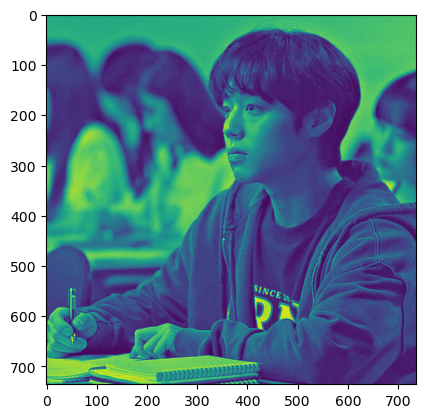

In [15]:
#lets lead the image
image=cv2.imread('image.jpg',cv2.IMREAD_GRAYSCALE)
plt.imshow(image)
print(image.shape)

In [58]:
# Load the grayscale image (replace 'image.jpg' with your image filename)
img = cv2.imread('image.jpg', cv2.IMREAD_GRAYSCALE)
if img is None:
    raise ValueError("Image not found or unable to load.")

# Helper function to display images
def display_images(images, titles, cmap='gray'):
    plt.figure(figsize=(15, 8))
    for i, (image, title) in enumerate(zip(images, titles)):
        plt.imshow(image, cmap=cmap)
        plt.title(title)
        plt.axis('off')
    plt.tight_layout()
    plt.show()


# Q1: Gaussian Filter Implementation #

In [35]:
# Different sigma values and border styles
sigma_values = [0.5, 1.0, 2.0]
border_types = [cv2.BORDER_REFLECT, cv2.BORDER_CONSTANT, cv2.BORDER_REPLICATE]
gaussian_results = []
gaussian_titles = []

for sigma in sigma_values:
    for border in border_types:
        # Kernel size: 6*sigma+1 (an odd number)
        ksize = int(6 * sigma + 1)
        if ksize % 2 == 0:
            ksize += 1
        filtered = cv2.GaussianBlur(img, (ksize, ksize), sigmaX=sigma, borderType=border)
        border_name = {cv2.BORDER_REFLECT: "Reflect", 
                       cv2.BORDER_CONSTANT: "Constant", 
                       cv2.BORDER_REPLICATE: "Replicate"}[border]
        gaussian_results.append(filtered)
        gaussian_titles.append(f"σ={sigma}, {border_name}")

# explanation:
# The Gaussian filter is a linear filter because its operation is a weighted sum
# of the neighborhood pixel intensities with weights defined by the Gaussian kernel.
# In the frequency domain, a Gaussian filter acts as a low-pass filter, attenuating high-frequency
# components (edges, noise) while preserving low-frequency components (smooth areas).

# Q2: Box Filter (Mean Filter) Comparison #

In [38]:
# Box filter implementation using cv2.blur
box_filtered = cv2.blur(img, (ksize, ksize))  # Using same kernel size as one of the Gaussian filters

# Comment:
# The box filter (mean filter) computes the average of the pixels in the kernel region.
# Compared to the Gaussian filter, it is simpler and gives equal weight to all pixels.
# This often results in poorer edge preservation because it does not weight central pixels more heavily,
# leading to more blurring of edges. However, in terms of noise reduction, both filters can smooth noise,
# but the Gaussian filter generally performs better in preserving edges.

# Q3: Laplacian Filter for Edge Detection #

In [41]:
# Apply Laplacian filter to detect edges
laplacian = cv2.Laplacian(img, cv2.CV_64F)
laplacian = cv2.convertScaleAbs(laplacian)

# Q4: Minimum Filter to Remove Salt Noise #

In [44]:
def minimum_filter(image, kernel_size):
    # Pad the image
    pad_size = kernel_size // 2
    padded = cv2.copyMakeBorder(image, pad_size, pad_size, pad_size, pad_size, cv2.BORDER_REPLICATE)
    filtered = np.zeros_like(image)
    # Iterate through each pixel
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            # Extract the kernel window and take minimum value
            window = padded[i:i+kernel_size, j:j+kernel_size]
            filtered[i, j] = np.min(window)
    return filtered

min_filter_3 = minimum_filter(img, 3)
min_filter_5 = minimum_filter(img, 5)
min_filter_7 = minimum_filter(img, 7)


# Q5: Maximum Filter to Remove Pepper Noise #

In [47]:
def maximum_filter(image, kernel_size):
    # Pad the image
    pad_size = kernel_size // 2
    padded = cv2.copyMakeBorder(image, pad_size, pad_size, pad_size, pad_size, cv2.BORDER_REPLICATE)
    filtered = np.zeros_like(image)
    # Iterate through each pixel
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            # Extract the kernel window and take maximum value
            window = padded[i:i+kernel_size, j:j+kernel_size]
            filtered[i, j] = np.max(window)
    return filtered

max_filter_3 = maximum_filter(img, 3)
max_filter_5 = maximum_filter(img, 5)
max_filter_7 = maximum_filter(img, 7)

# Q6: Median Filter Discussion #

In [50]:
# Applying median filter using built-in function for demonstration
median_filtered = cv2.medianBlur(img, 3)  # kernel size of 3
# Explanation:
# The median filter is non-linear because it replaces each pixel with the median of the neighborhood,
# not a linear weighted sum. This makes it very effective at removing salt-and-pepper noise,
# as the median operation can remove outliers (the noisy pixels) without blurring the edges as much as the Gaussian filter.

# Q7: Midpoint Filter Implementation #

In [62]:
def midpoint_filter(image, kernel_size):
    pad = kernel_size // 2
    padded = cv2.copyMakeBorder(image, pad, pad, pad, pad, cv2.BORDER_REPLICATE)
    filtered = np.empty_like(image)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            roi = padded[i:i+kernel_size, j:j+kernel_size]
            filtered[i, j] = (roi.min() + roi.max()) // 2
    return filtered

midpoint_filtered = midpoint_filter(img, 3)
 # example with 3x3 kernel

C:\Users\lsrin\AppData\Local\Temp\ipykernel_3484\34381802.py:8: RuntimeWarning: overflow encountered in scalar add
  filtered[i, j] = (roi.min() + roi.max()) // 2


# Display Results

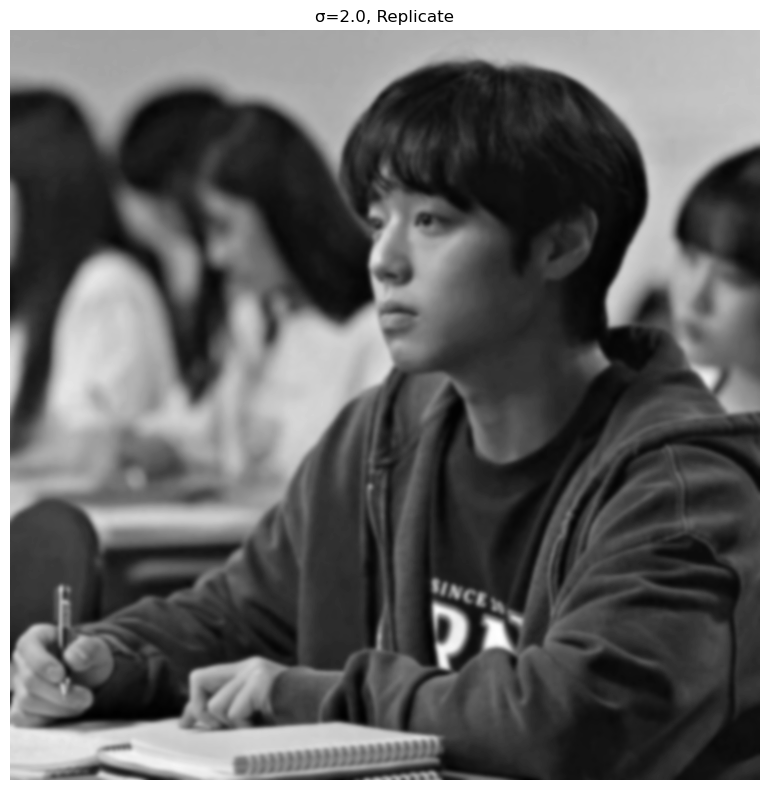

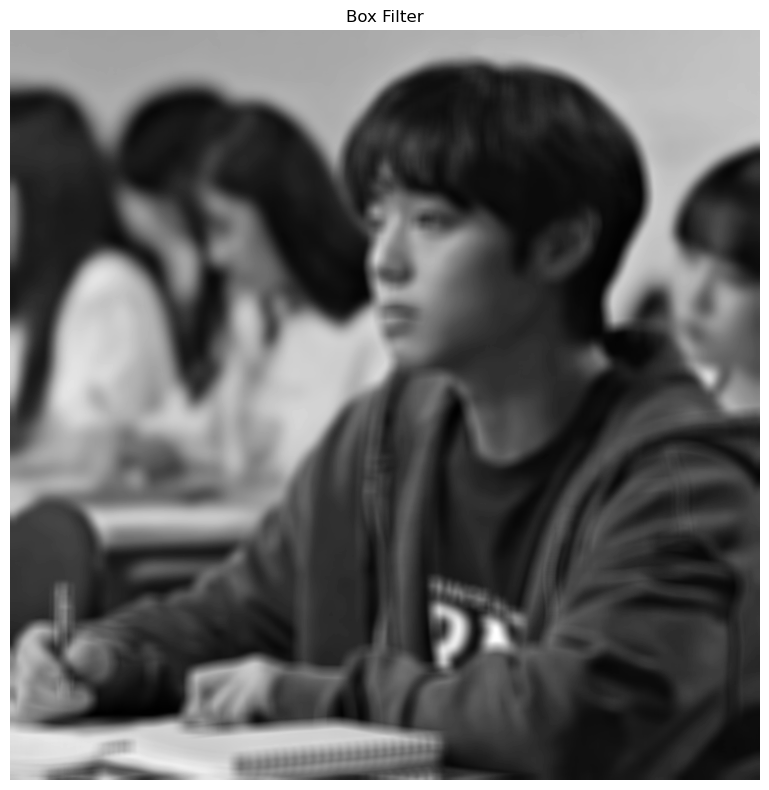

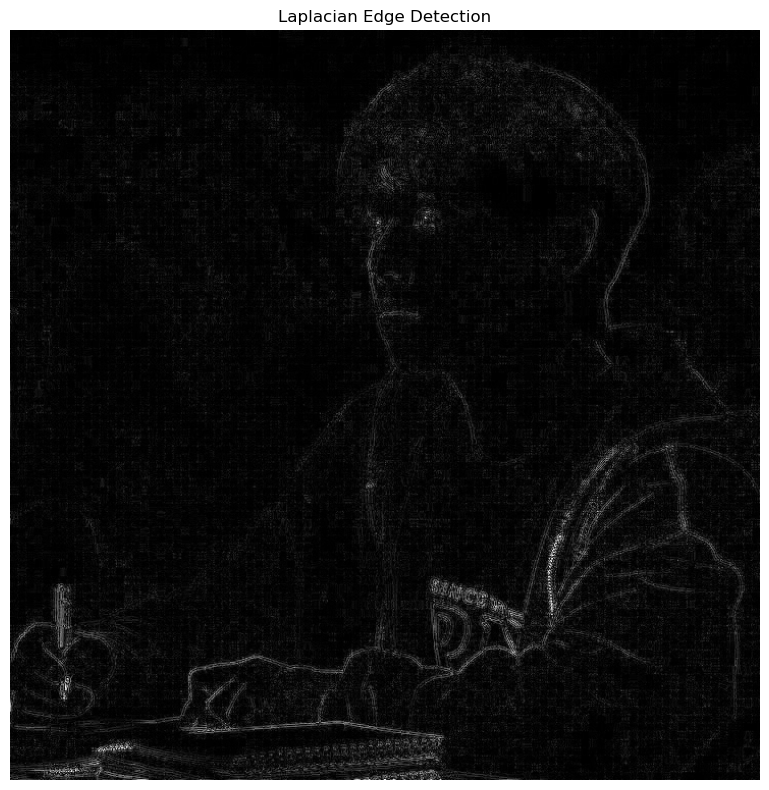

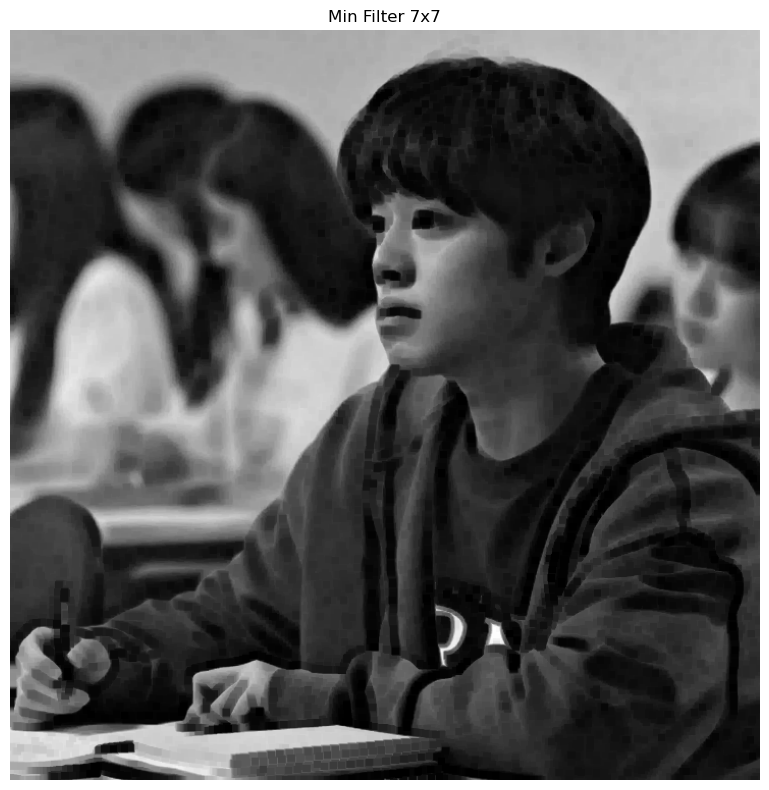

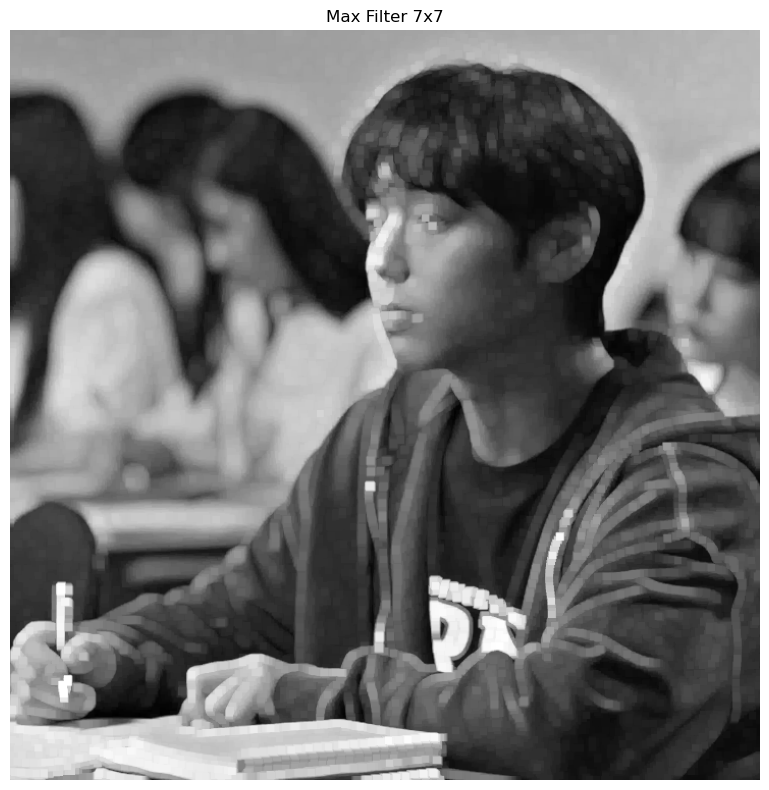

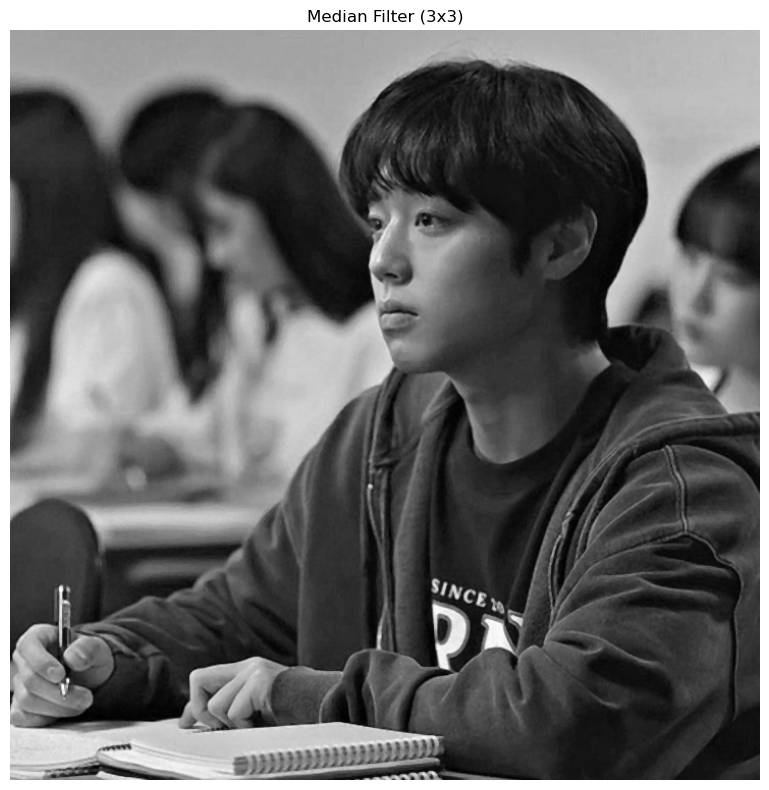

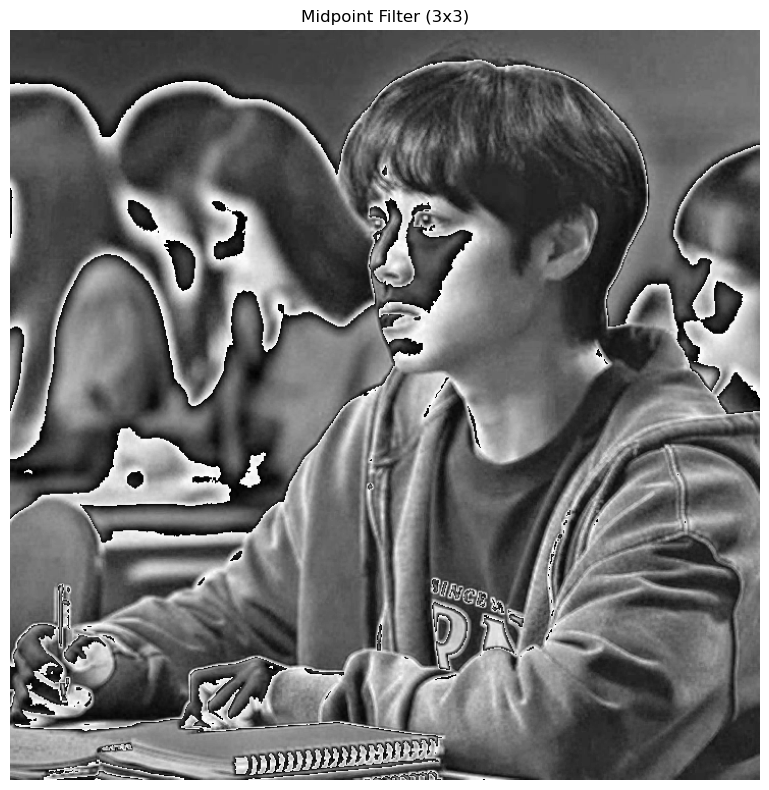

In [60]:
# Display Gaussian filter results
display_images(gaussian_results, gaussian_titles)

# Display Box filter vs Gaussian filter (using one example kernel size)
display_images([img, box_filtered], ['Original', 'Box Filter'])

# Display Laplacian edge detection result
display_images([img, laplacian], ['Original', 'Laplacian Edge Detection'])

# Display minimum filter results
display_images([img, min_filter_3, min_filter_5, min_filter_7],
               ['Original', 'Min Filter 3x3', 'Min Filter 5x5', 'Min Filter 7x7'])

# Display maximum filter results
display_images([img, max_filter_3, max_filter_5, max_filter_7],
               ['Original', 'Max Filter 3x3', 'Max Filter 5x5', 'Max Filter 7x7'])

# Display Median filter result
display_images([img, median_filtered], ['Original', 'Median Filter (3x3)'])

# Display Midpoint filter result
display_images([img, midpoint_filtered], ['Original', 'Midpoint Filter (3x3)'])
